# package & data load

따릉이 대여 건수 예측

질문: 2023년 상반기 일별 따릉이 대여 건수 예측하기

데이터: 서울시 공공자전거 '따릉이'에 대한 5년 간의 일별 대여 건수 데이터.  

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bike = pd.read_csv('/content/따릉이 대여 건수 예측.csv',encoding='utf-8',thousands = ',')

# EDA

In [ ]:
bike.head()

,대여일시,대여건수
0,2018-01-01,4950.0
1,2018-01-02,7136.0
2,2018-01-03,7156.0
3,2018-01-04,7102.0
4,2018-01-05,7705.0


In [ ]:
bike.isna().sum()

대여일시    180
대여건수    180
dtype: int64

In [ ]:
bike.shape

(2005, 2)

1825개의 data (excel file) => data가 증가한 형태로 뽑힘. -> na는 삭제

In [ ]:
bike[bike['대여건수'].isna()==True]

,대여일시,대여건수
1825,NaN,NaN
1826,NaN,NaN
1827,NaN,NaN
1828,NaN,NaN
1829,NaN,NaN
...,...,...
2000,NaN,NaN
2001,NaN,NaN
2002,NaN,NaN
2003,NaN,NaN


In [ ]:
bike.dropna(inplace=True)

In [ ]:
bike['대여일시'] = pd.to_datetime(bike['대여일시'])
bike = bike.set_index('대여일시')

In [ ]:
bike.head()

,대여건수
대여일시,
2018-01-01,4950.0
2018-01-02,7136.0
2018-01-03,7156.0
2018-01-04,7102.0
2018-01-05,7705.0


In [ ]:
bike.describe()

,대여건수
count,1825.000000
mean,68990.329315
std,45513.790036
min,482.000000
25%,32059.000000
50%,60371.000000
75%,97939.000000
max,192638.000000


# plot

In [ ]:
bike.dtypes

대여건수    float64
dtype: object

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

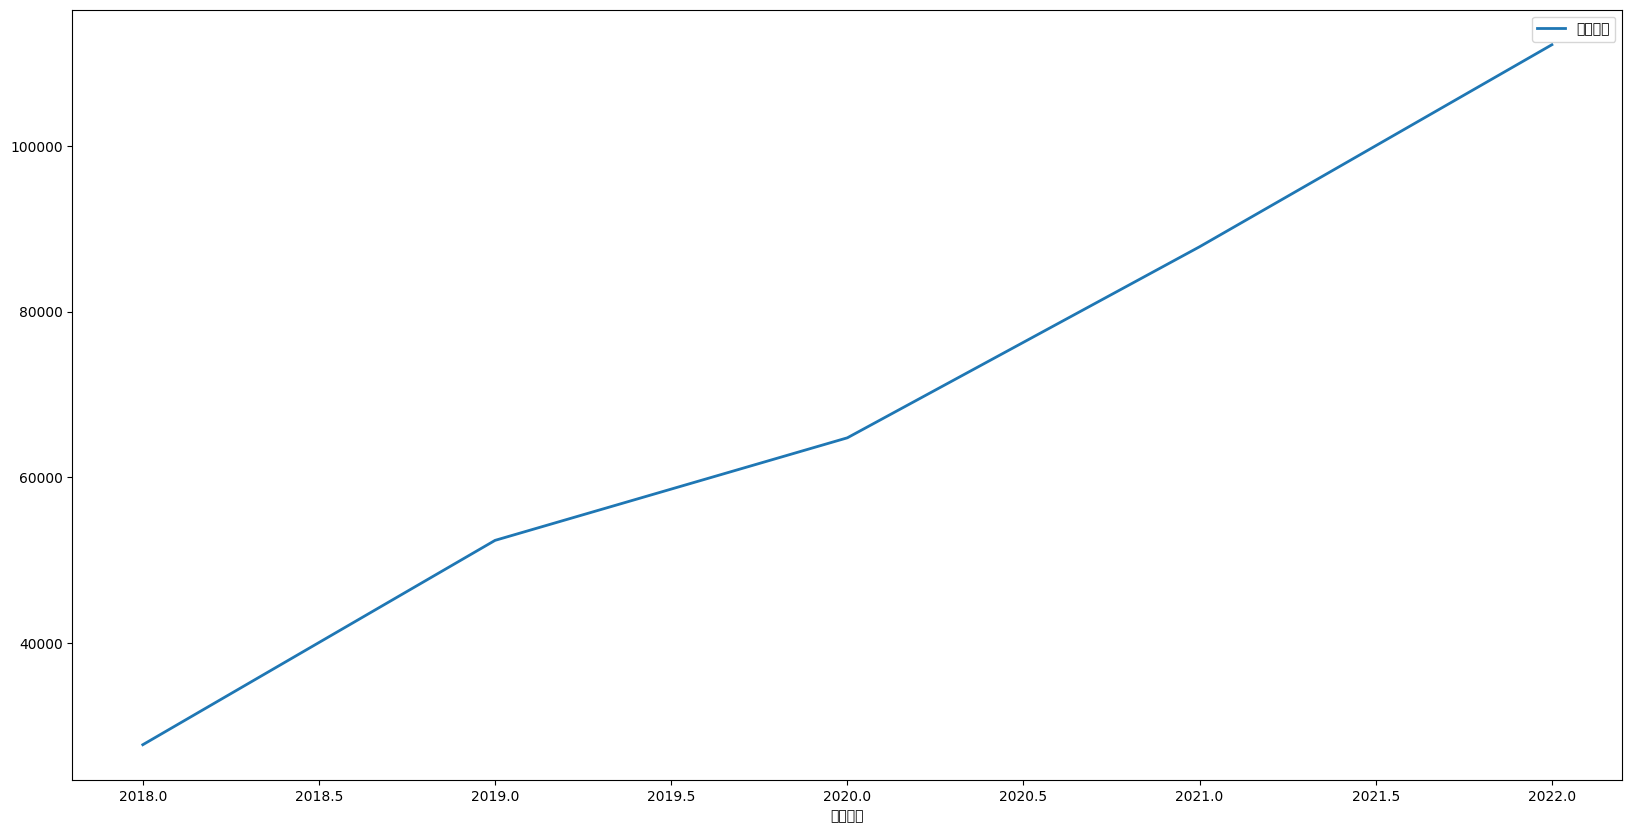

In [ ]:
#moving avg model(년별) ; 5년간의 데이터를 보여주고 있으므로

index_year = bike.index.year

bike_mean = bike.groupby(index_year).mean()

bike_mean.plot(linewidth=2)

plt.show()

상승하는 경향성을 보임.

In [ ]:
#chapter 4-3에서 scatterplot확인 (exercise 문제)

{'whiskers': [<matplotlib.lines.Line2D at 0x7df54ad2de70>,
 'caps': [<matplotlib.lines.Line2D at 0x7df54ad2c100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df54ad2f940>],
 'medians': [<matplotlib.lines.Line2D at 0x7df54ad2f520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df54ad2ed70>],
 'means': []}

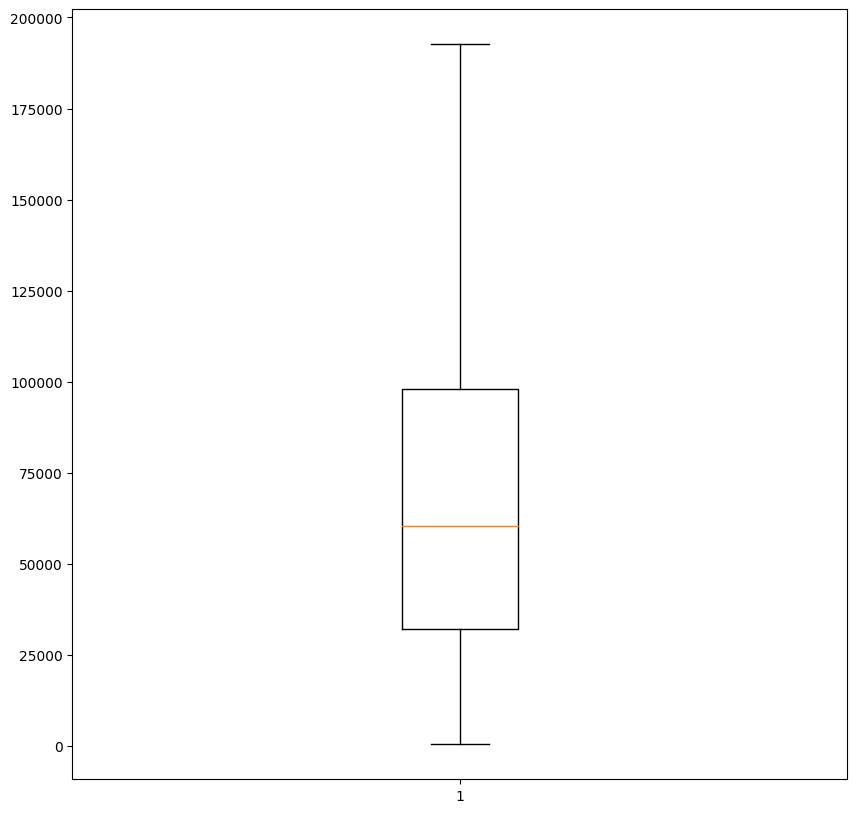

In [ ]:
#boxplot
plt.figure(figsize = (10,10))
plt.boxplot(bike)

outlier 존재 X

<ipython-input-302-3319be7c286c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bike, ax=ax)


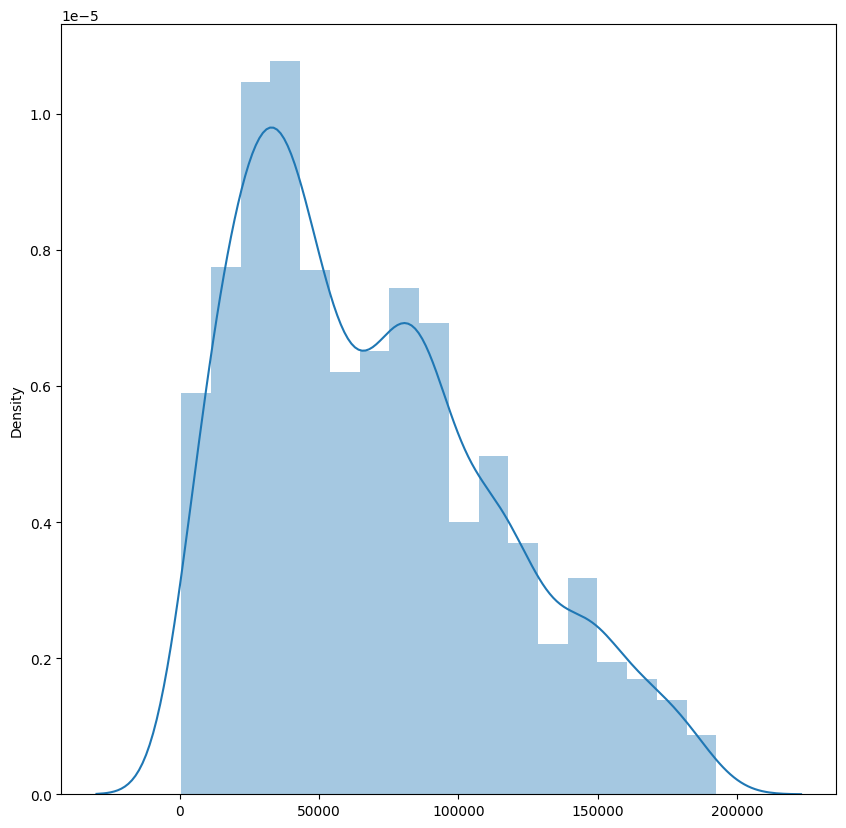

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10),nrows=1,ncols=1)
sns.distplot(bike, ax=ax)
plt.show()

정규분포 형태는 아님

# 시계열 분석

## ACF & PACF

In [ ]:
from statsmodels.graphics import tsaplots

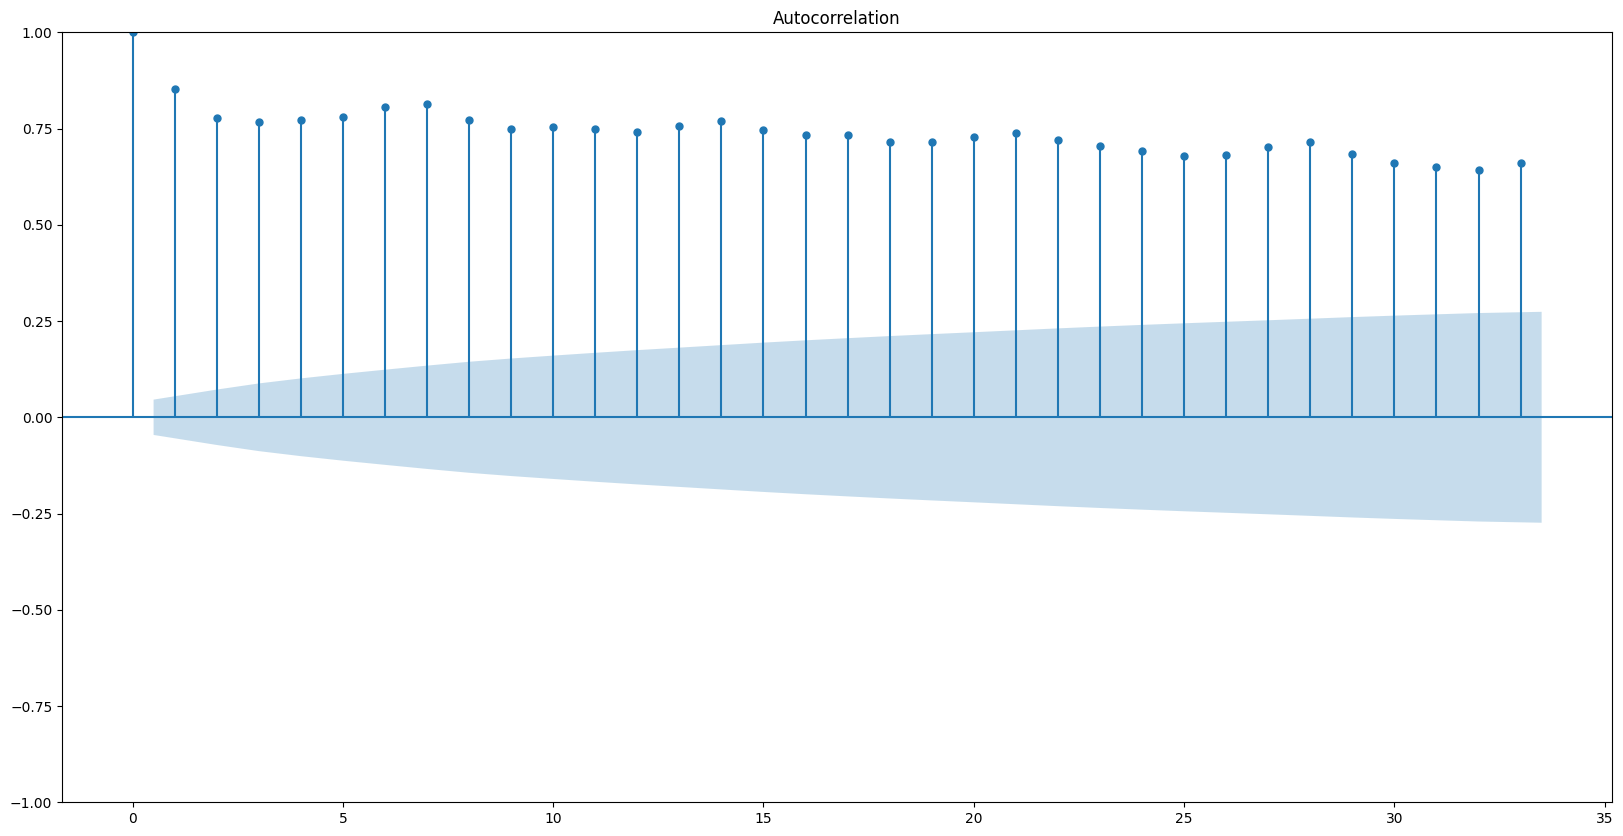

In [ ]:
#ACF
fig = tsaplots.plot_acf(bike)
plt.show()

천천히 수렴하는 형태 : 차분 필요할 것.

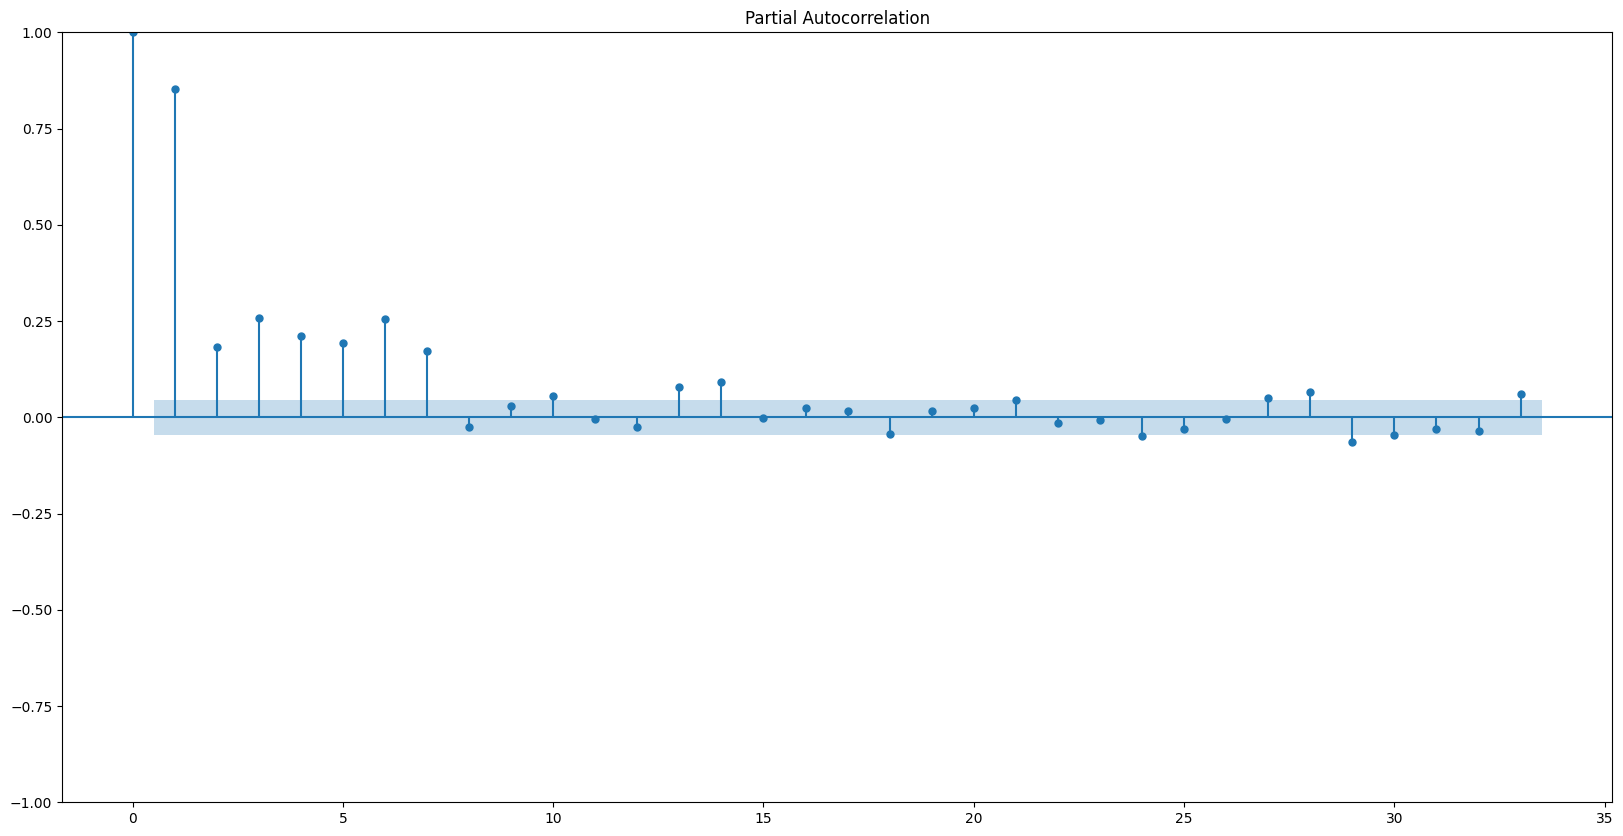

In [ ]:
fig = tsaplots.plot_pacf(bike)
plt.show()

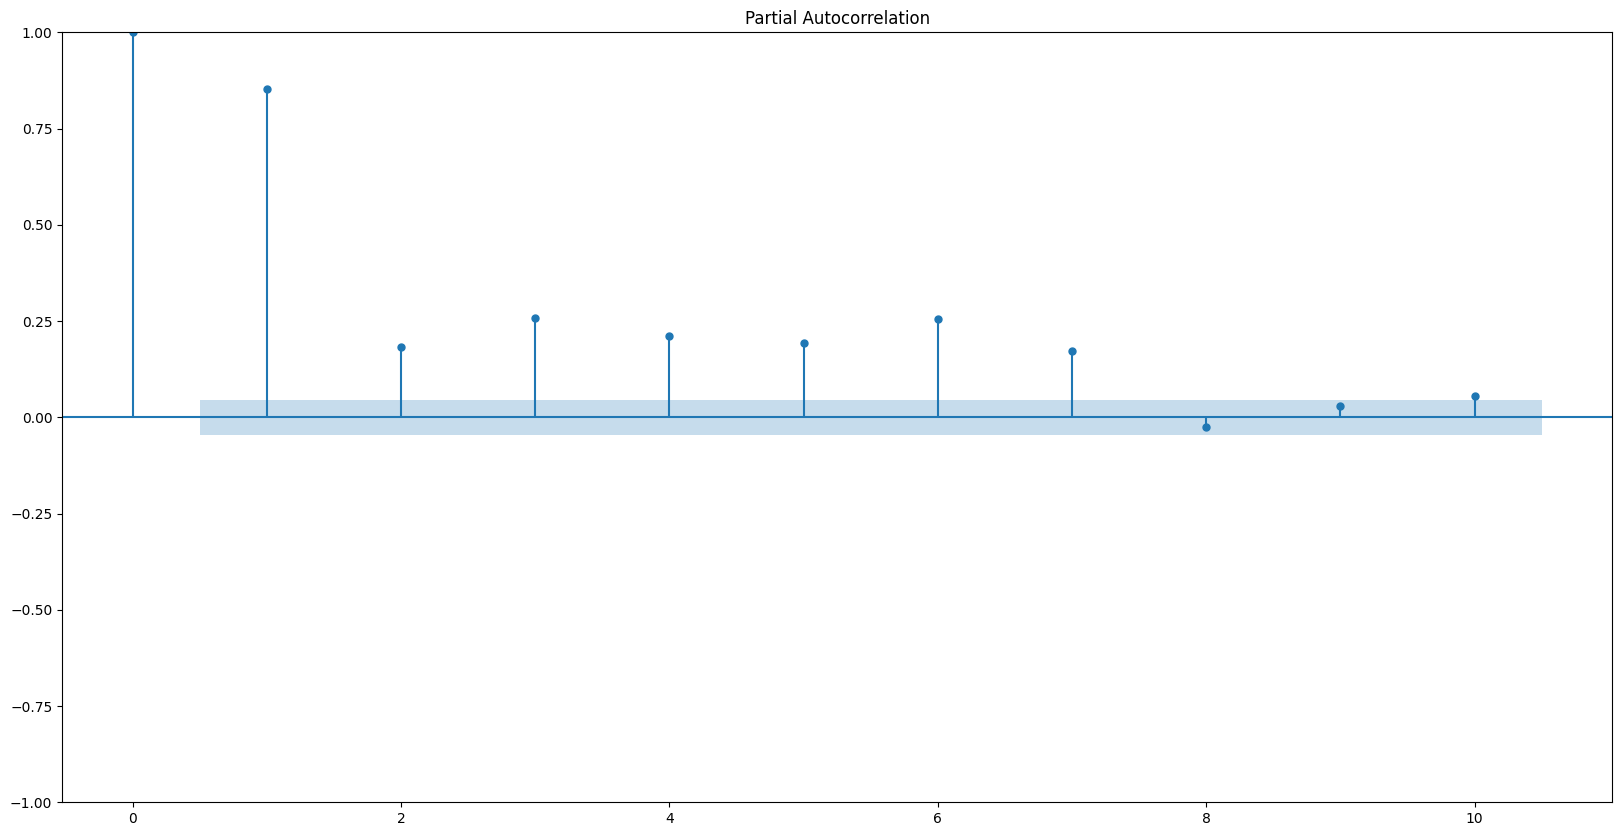

In [ ]:
fig = tsaplots.plot_pacf(bike,lags=10)
plt.show()

지수적으로 감소하다가 7 이후 절단

## ADF test (추세 확인)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(bike)
result

(-2.529976512891855,
 0.1083500142702914,
 13,
 1811,
 {'1%': -3.433966009459769,
  '5%': -2.8631372667825503,
  '10%': -2.567620331903232},
 40833.11183340178)

추세 있다고 볼 수 있음

## 차분

In [ ]:
bike_diff = bike.diff().dropna()
result1 = adfuller(bike_diff)
result1

(-17.76409367595135,
 3.3288637879566476e-30,
 12,
 1811,
 {'1%': -3.433966009459769,
  '5%': -2.8631372667825503,
  '10%': -2.567620331903232},
 40815.96501062513)

1차 차분으로 추세는 없어졌다고 판단할 수 있을 것.

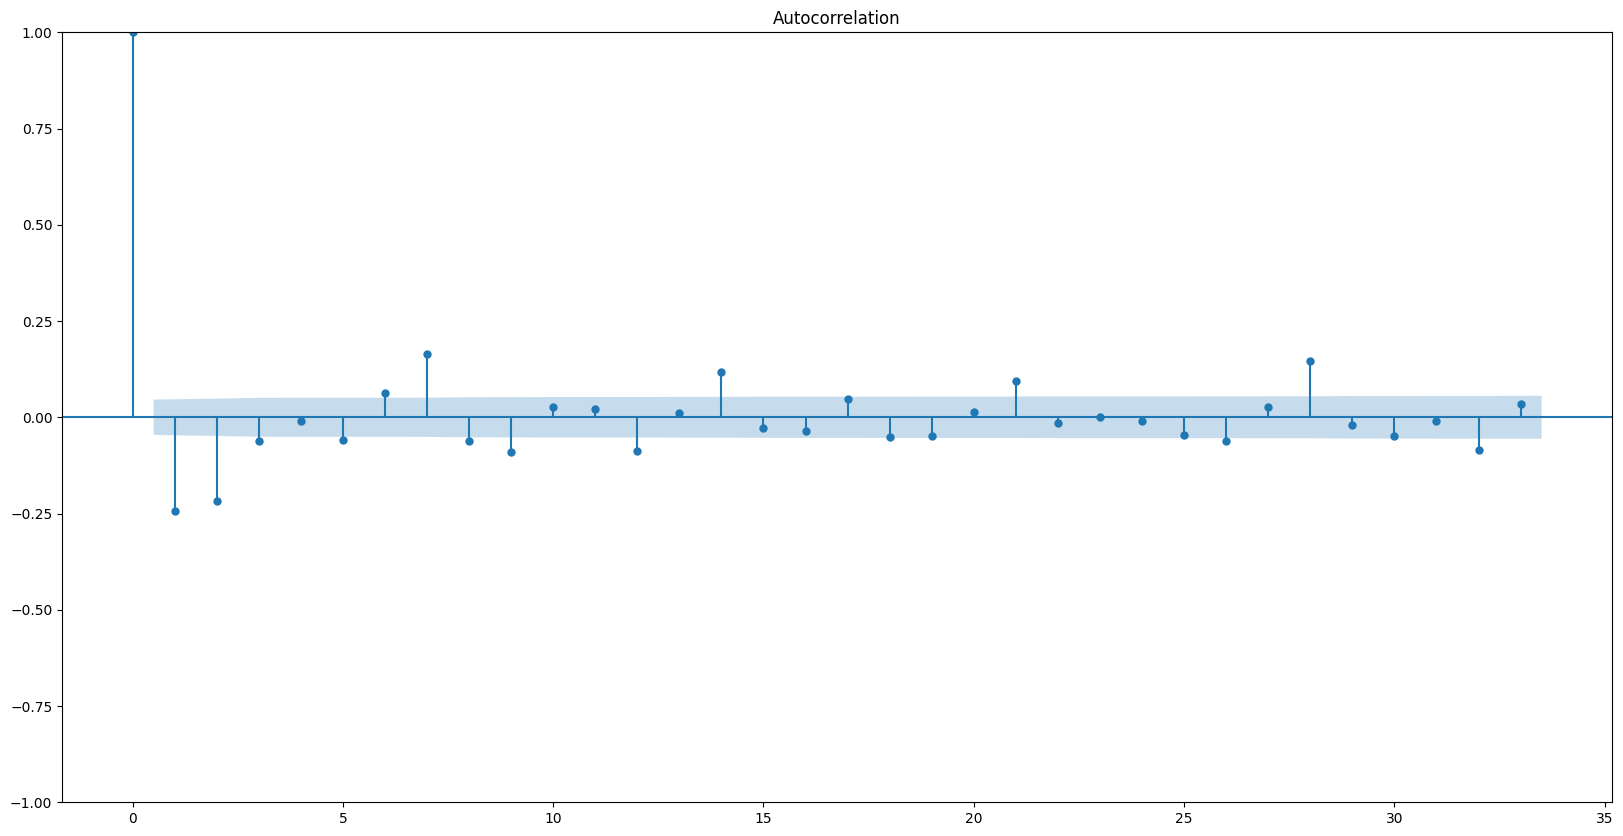

In [ ]:
fig = tsaplots.plot_acf(bike_diff)
plt.show()

지수적으로 감소하다가 시점 3 이후 절단.

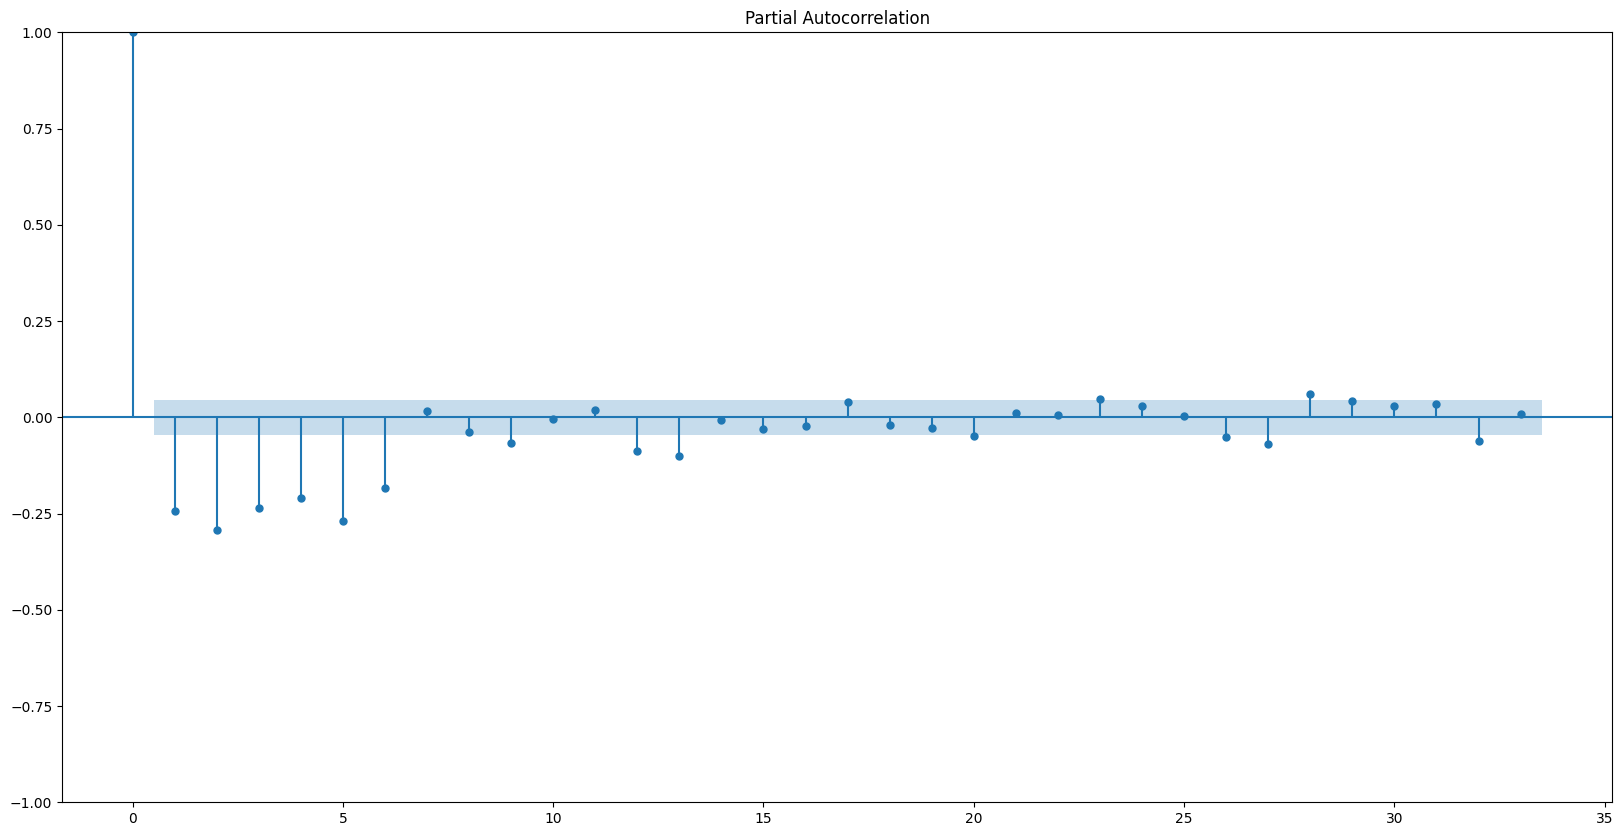

In [ ]:
fig = tsaplots.plot_pacf(bike_diff)
plt.show()

지수적 감소하다가 6 정도에서 절단되는 꼴.

### 최적의 차분 계수 결정

In [ ]:
pip install pmdarima

In [ ]:
import pmdarima as pm
from pmdarima.arima import ndiffs

In [ ]:
n_diffs = ndiffs(bike, alpha = 0.05, test='adf', max_d =3)
print(f"추정된차수 d = {n_diffs}")

추정된차수 d = 1


# 시계열 분해

In [ ]:
import statsmodels.api as sm
from pylab import rcParams

In [ ]:
bike.index
#freq=None으로 설정되어 있음 -> freq설정해야 decomposition 가능

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='대여일시', length=1825, freq=None)

In [ ]:
bike_decom = bike.asfreq('D',method="bfill")
bike_decom.isna().sum()

대여건수    0
dtype: int64

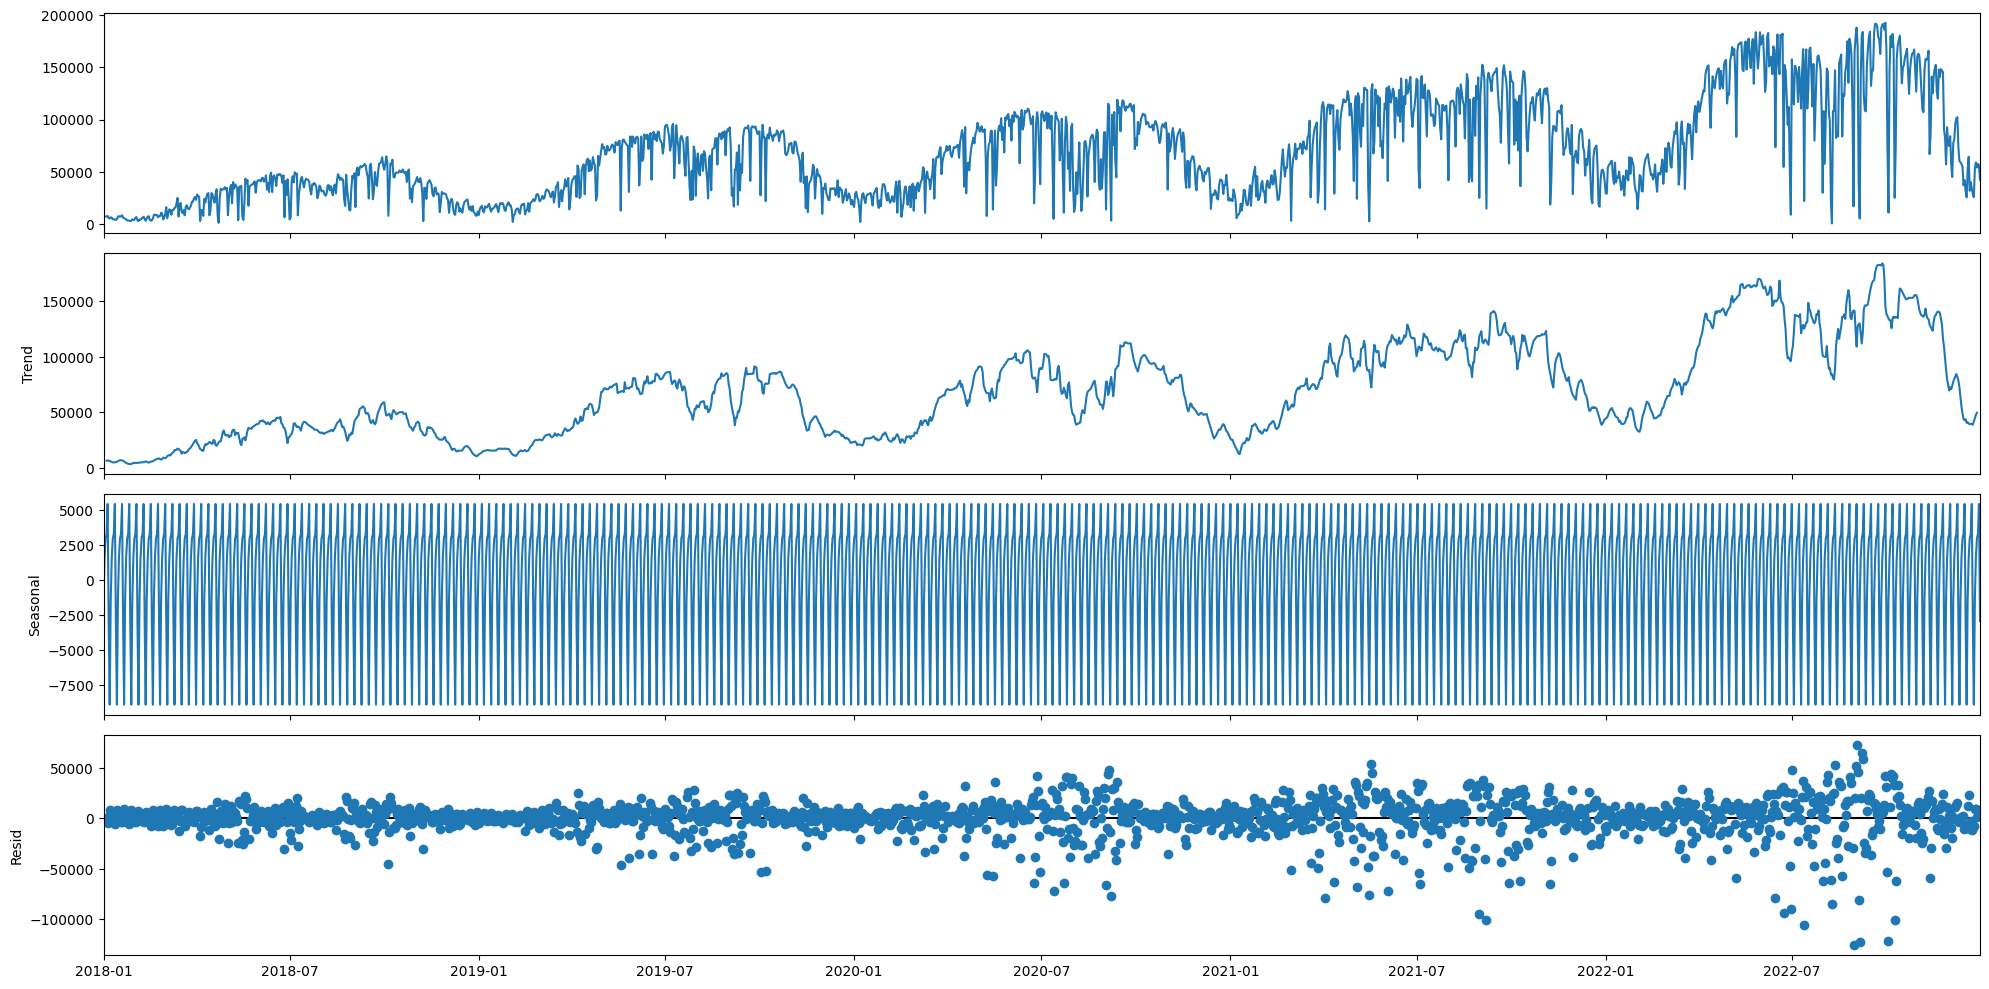

In [ ]:
rcParams['figure.figsize'] = 20,10
decomposition = sm.tsa.seasonal_decompose(bike_decom)

fig = decomposition.plot()

plt.show()

## seasonality

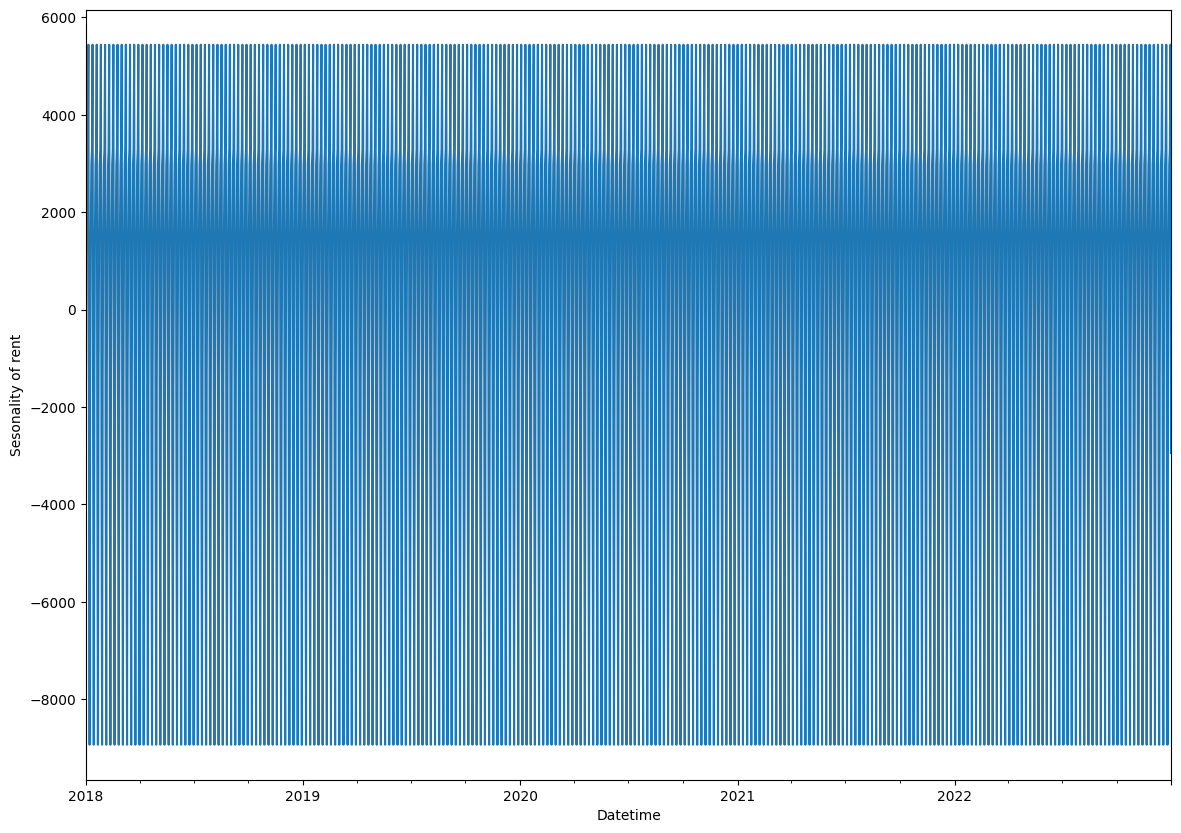

In [ ]:
decomp_seasonal = decomposition.seasonal

ax=decomp_seasonal.plot(figsize=(14,10))
ax.set_xlabel('Datetime')
ax.set_ylabel('Sesonality of rent')

plt.show()

## trend

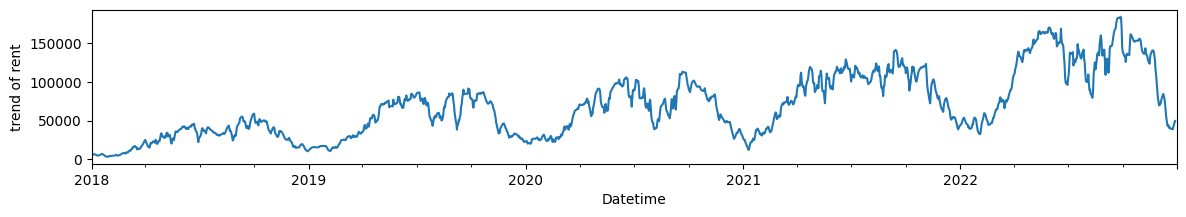

In [ ]:
#trend
decomp_trend = decomposition.trend

ax=decomp_trend.plot(figsize=(14,2))
ax.set_xlabel('Datetime')
ax.set_ylabel('trend of rent')

plt.show()

추세 존재하는 것 같음 (우상향하는 형태)

## noise

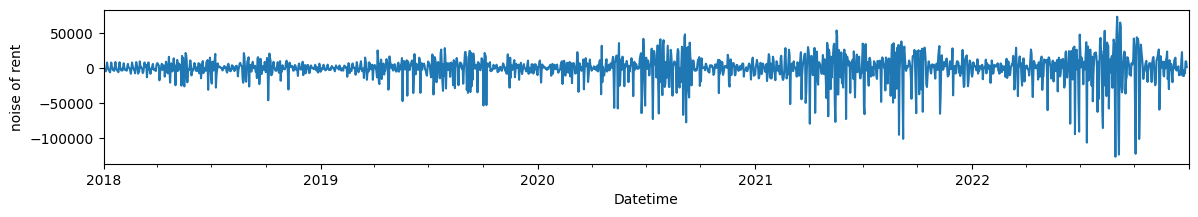

In [ ]:
#noise
decomp_noise = decomposition.resid

ax=decomp_noise.plot(figsize=(14,2))
ax.set_xlabel('Datetime')
ax.set_ylabel('noise of rent')

plt.show()

분산이 일정하다고 보기 어려워보임.

# ARIMA 모형


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = pm.auto_arima(y=bike,d=1,start_p=0,max_p = 4, start_q = 0,max_q=7,
                      m=1, seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=42059.537, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=41950.872, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=41648.153, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=42057.538, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=41515.295, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=41472.967, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=41787.987, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=41467.620, Time=0.53 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=41686.837, Time=0.17 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=41451.079, Time=0.94 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=41607.579, Time=0.25 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=41455.548, Time=0.84 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=41447.568, Time=3.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=41446.547, Time=2.34 sec
 ARIMA(1,1,2)(0,0,0

In [ ]:
model = ARIMA(bike, order = (2,1,4))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   대여건수   No. Observations:                 1825
Model:                 ARIMA(2, 1, 4)   Log Likelihood              -20694.465
Date:                Mon, 28 Aug 2023   AIC                          41402.930
Time:                        09:43:22   BIC                          41441.492
Sample:                             0   HQIC                         41417.155
                               - 1825                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2331      0.009    143.674      0.000       1.216       1.250
ar.L2         -0.9791      0.008   -121.593      0.000      -0.995      -0.963
ma.L1         -1.7809      0.016   -108.011      0.0

In [ ]:
mean_foreacast = model_fit.get_forecast(steps=180).predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
#sample submission
predict = pd.DataFrame(mean_forecast)
predict

,predicted_mean
1825,8.155424e+04
1826,1.254991e+05
1827,1.769619e+05
1828,2.334038e+05
1829,2.886247e+05
...,...
2000,8.533439e+06
2001,8.581129e+06
2002,8.630004e+06
2003,8.679587e+06


In [ ]:
pip install openpyxl

In [ ]:
import openpyxl
from openpyxl.utils.dataframe import dataframe_to_rows
wb=openpyxl.load_workbook('/content/제출 파일 양식(따릉이 대여 건수 예측).xlsx')

In [ ]:
sheet = wb.active
for r in dataframe_to_rows(predict, index=False, header=False):
    sheet.append(r)
wb.save('따릉이_submission_정윤주.xlsx')